In [1]:
import numpy as np
from PYME.recipes import modules
from PYME.LMVis import pipeline
from PYME.recipes import localisations
from PYME.recipes import tablefilters
from PYME.recipes import tracking
from PYMEcs.misc.utils import pyme_logging_filter

pyme_logging_filter() # supress a few minor warnings

data = pipeline.Pipeline('030320_sF(ROI+fiducial).hdf') 
data.recipe.update_from_yaml('recipe to drift correct and filter 030320.yaml') 
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) 
data.selectDataSource('ROI')

co = tracking.FindClumps(inputName='ROI', outputName='with_clumps', outputClumps=''); data.recipe.add_module(co);
clu = localisations.MergeClumps(inputName='with_clumps', outputName='coalesced'); data.recipe.add_module(clu);
DBS = localisations.DBSCANClustering(inputName='coalesced', outputName='dbscanClustered', minClumpSize = 3, searchRadius = 50,); data.recipe.add_module(DBS);
ids = tablefilters.FilterTable(inputName='dbscanClustered', outputName='validCluster', filters = {'dbscanClumpID' : [0.5, 185]}); data.recipe.add_module(ids);
data.recipe.execute()

Trying to load 3rd party recipe module PYMEcs.recipes.localisations
Loaded 3rd party recipe module PYMEcs.recipes.localisations
Trying to load 3rd party recipe module PYMEcs.recipes.base
Loaded 3rd party recipe module PYMEcs.recipes.base
Trying to load 3rd party recipe module PYMEnf.recipes.pymenf
Loaded 3rd party recipe module PYMEnf.recipes.pymenf
Trying to load 3rd party recipe module PYMEcs.recipes.output
Loaded 3rd party recipe module PYMEcs.recipes.output
Trying to load 3rd party recipe module PYMEcs.recipes.simpler
Loaded 3rd party recipe module PYMEcs.recipes.simpler
Trying to load 3rd party recipe module PYMEcs.recipes.processing
Loaded 3rd party recipe module PYMEcs.recipes.processing


/Users/csoe002/Documents/src/PYMEsrc/PYME-extra-py38/PYMEcs/Analysis/trackFiducials.py:154: RuntimeWarning: Mean of empty slice
  mm = np.nanmean(meas, 0)


Available data sources: _Localizations, FitResults, Localizations, colour_mapped, filtered_localizations, find_fid, fiducialAdded, fiducialApplied, corrected_fiducials, ROI


Created colour filter with chans: ['block0', 'block1']
res-1/7     = 33.0 nm


<IPython.core.display.Javascript object>


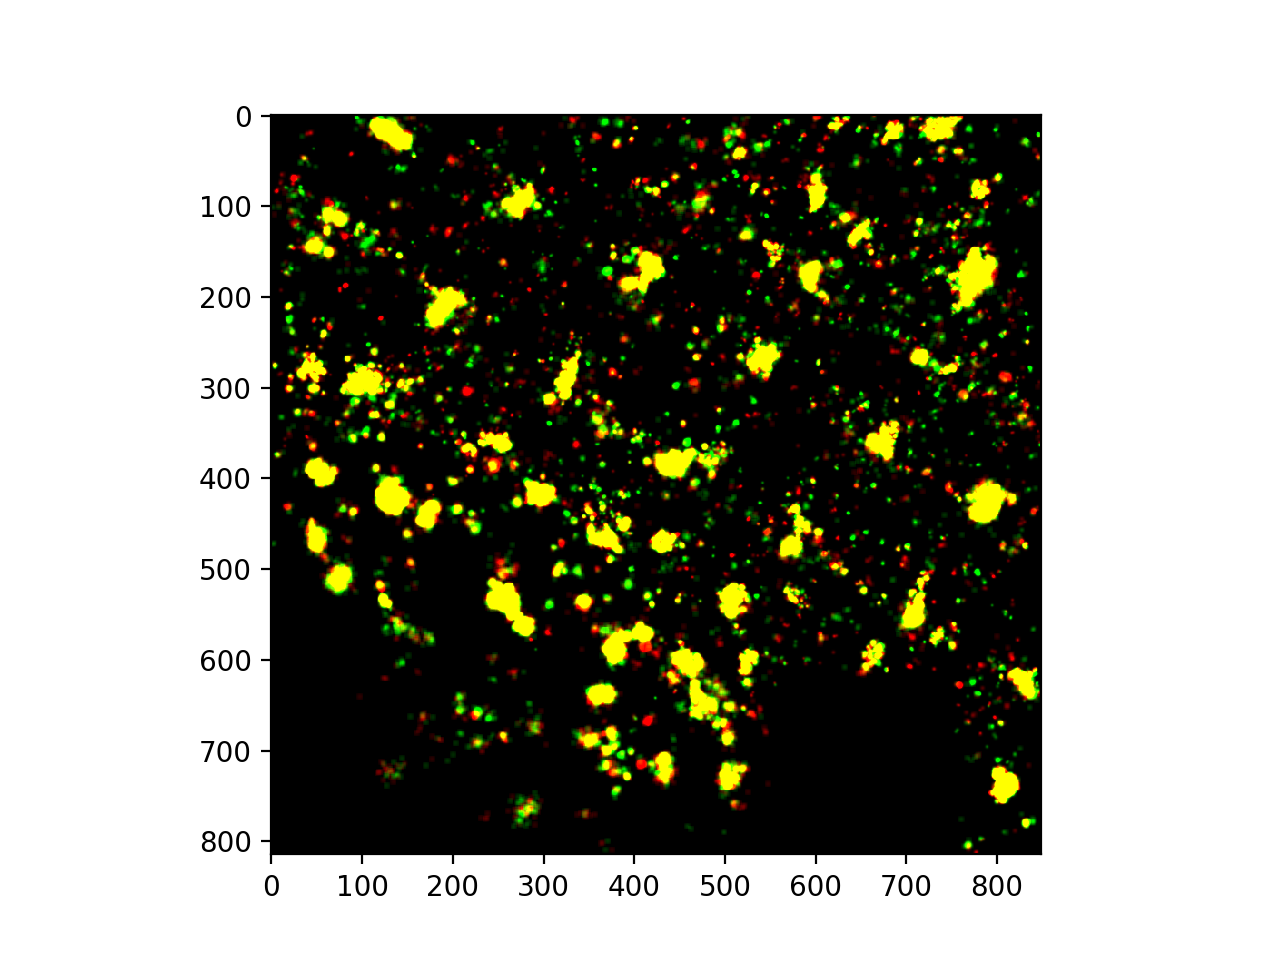

In [2]:
import matplotlib.pyplot as plt
tb = localisations.TimeBlocks(input='ROI',output='tbROI', block_size=100)
data.recipe.add_module(tb)
dm = localisations.DensityMapping(inputLocalizations='tbROI', jitterVariable="error_x",outputImage="FRCROI",
    pixelSize=10.0, renderingModule='Gaussian', colours=['block0','block1'])
data.recipe.add_module(dm)
data.recipe.execute()
image = data.dataSources['FRCROI']
from PYMEcs.experimental import FRC
freqs,frc1,smoothed,fhb,f7,halfbit = FRC.frc_from_image(image,[0,1])
print('res-1/7     = %3.1f nm' % (1.0/f7[0]));
data.recipe.execute()
# CS code
def rgbwrap(r,g=None,b=None,vmax=None,vmin=None):
    if vmax is None:
        vmax = r.max()
    if vmin is None:
        vmin = r.min()
    rgbim = np.zeros(list(r.shape[0:2])+[3])
    rgbim[:,:,0] = (r-vmin)/(vmin+vmax)
    if not (g is None):
        rgbim[:,:,1] = (g-vmin)/(vmin+vmax)
    if not (b is None):
        rgbim[:,:,2] = (b-vmin)/(vmin+vmax)
    return rgbim

FRC_entire_ROI = data.dataSources['FRCROI']

rgbim = rgbwrap(FRC_entire_ROI.data_xytc[:,:,0,0].squeeze(),FRC_entire_ROI.data_xytc[:,:,0,1].squeeze(),vmax=0.2)
plt.figure(); plt.imshow(rgbim)

Created colour filter with chans: ['block0', 'block1']
res-1/7     = 36.4 nm


<IPython.core.display.Javascript object>


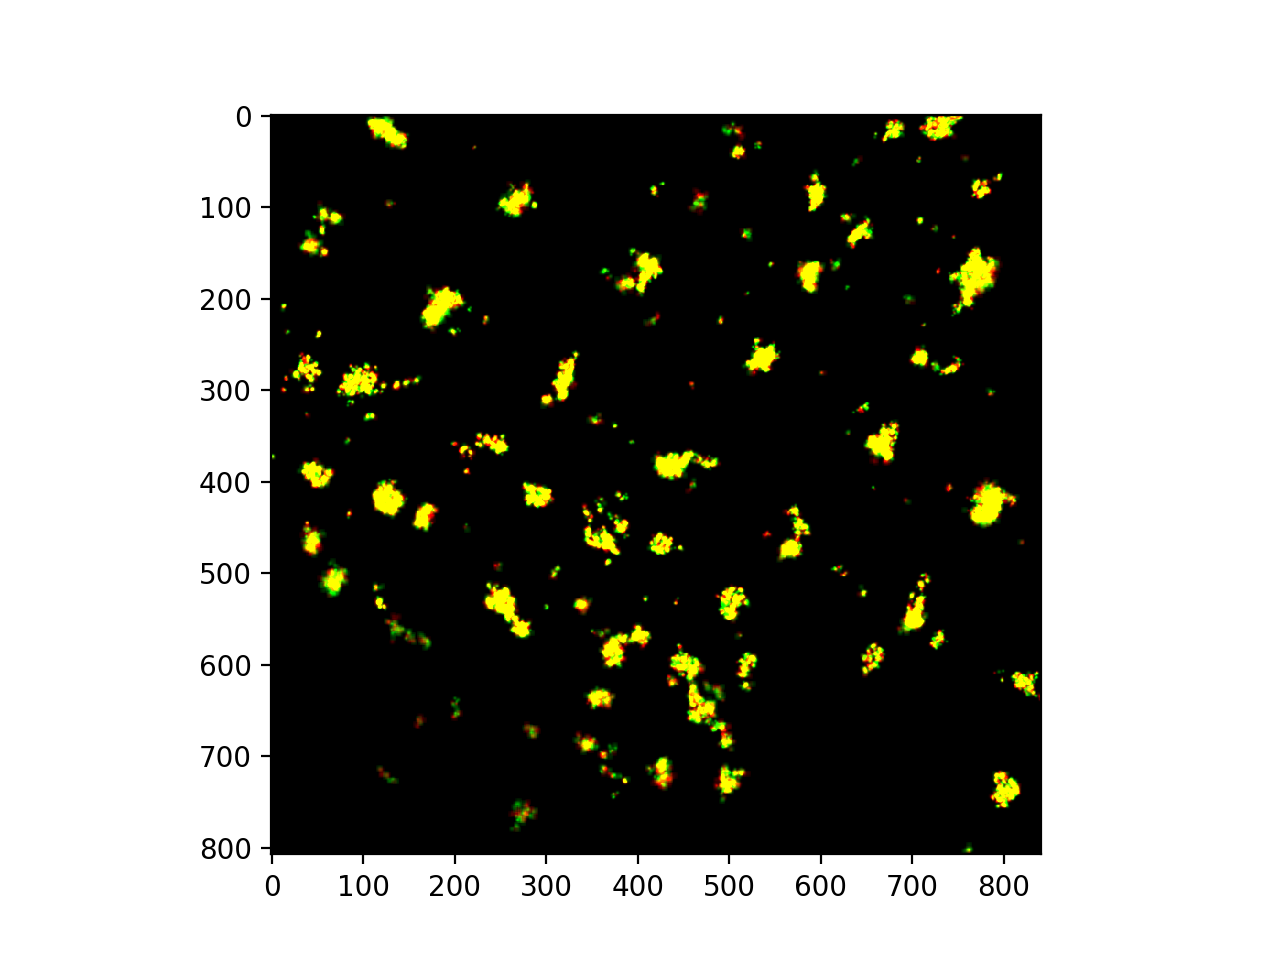

In [3]:
data.selectDataSource('validCluster')
tb = localisations.TimeBlocks(input='validCluster',output='tbvalidCluster', block_size=100)
data.recipe.add_module(tb)
dm = localisations.DensityMapping(inputLocalizations='tbvalidCluster', 
                                  jitterVariable="error_x",outputImage="FRCvalidCluster",
    pixelSize=10.0, renderingModule='Gaussian', colours=['block0','block1'])
data.recipe.add_module(dm)
data.recipe.execute()
image = data.dataSources['FRCvalidCluster']
from PYMEcs.experimental import FRC
freqs,frc1,smoothed,fhb,f7,halfbit = FRC.frc_from_image(image,[0,1])
print('res-1/7     = %3.1f nm' % (1.0/f7[0]));
data.recipe.execute()
# CS code
def rgbwrap(r,g=None,b=None,vmax=None,vmin=None):
    if vmax is None:
        vmax = r.max()
    if vmin is None:
        vmin = r.min()
    rgbim = np.zeros(list(r.shape[0:2])+[3])
    rgbim[:,:,0] = (r-vmin)/(vmin+vmax)
    if not (g is None):
        rgbim[:,:,1] = (g-vmin)/(vmin+vmax)
    if not (b is None):
        rgbim[:,:,2] = (b-vmin)/(vmin+vmax)
    return rgbim

FRC_entire_ROI = data.dataSources['FRCvalidCluster']

rgbim = rgbwrap(FRC_entire_ROI.data_xytc[:,:,0,0].squeeze(),FRC_entire_ROI.data_xytc[:,:,0,1].squeeze(),vmax=0.2)
plt.figure(); plt.imshow(rgbim)